# Chapter 6: Hypothesis Testing

## Incomplete Data 

Creating accurate predictions is one of the most valuable skills in the job market today. Statisticians, economists, and data scientists use data gathered from specific populations in order to predict the future. Through computational and statistical techniques, we can make _statistical inferences_ to draw conclusions from data that are often incomplete.

As far as estimations of parameters that already exist, having full population data would mean that our questions about that population are answered. But because the cost of gathering a full set of information typically outweigh the benefits of having perfectly accurate data, we are okay with use data samples to draw inferences about past data and predict future observations. 

## Are Mutual Funds better than Broad-market index funds?

The term “index fund” refers to the investment approach of a fund. Specifically, it is a fund that that aims to match the performance of a particular market index, such as the S&P 500 or Russell 2,000. The index fund simply tries to match the market. This differs from a more actively managed fund, in which investments are picked by a fund manager in an attempt to beat the market. The age old question is: are the fees payed to an actively-managed mutual fund worth it? 

We could simply compare the mean return from a given date range for a mutual fund and compare it to the S&P500s mean return from the same time interval, and see which is higher. But the fact that mutual funds have a limited number of time intervals which we can sample means we cannnot rule out the possibility that higher or lower returns from the fund were a result of random variation, and not an indicator of the true quality of the fund. Returns to investment in the S&P500 is a quality proxy for returns in equity markets. Although returns to the S&P 500 experience stochasticity, on average the average rate of return from a mutual fund data should beat S&P returns on average if active investment is actually improving the rate of return. So, we need to analyze the two funds using statistical techniques which account for random variation that is possible from incomplete data. 

We would like to ananlyze which(if any) mutual funds have out-performed the market, fees included. To start, we read the CSV downloaded from [Stock Market MBA](https://stockmarketmba.com/listoftop100activelymanagedusstockmutualfunds.php), which shows the 100 largest actively-managed mutual funds in the US. 

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
# import the mutualfund dataset
mutual_fund_data = pd.read_csv('Top100MutualFunds.csv')
mutual_fund_data

,Symbol,Name,Category1,Category2,Category3,Morningstar Category,Morningstar Rating,Market cap,Current yield,Fees,Action
0,AGTHX,American Funds The Growth Fund of America Class A,US Equity,Broad market,Large cap,Large Growth,3.0,"$138,592,080,000",0.22%,0.62%,Analyze
1,FCNTX,Fidelity Contrafund Fund,US Equity,Broad market,Large cap,Large Growth,3.0,"$121,762,870,000",0.00%,0.74%,Analyze
2,CWMAX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",1.46%,0.63%,Analyze
3,CWMCX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",0.79%,1.40%,Analyze
4,CWMEX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",1.28%,0.87%,Analyze
...,...,...,...,...,...,...,...,...,...,...,...
95,FDTRX,Franklin DynaTech Fund Class R6,US Equity,Broad market,Large cap,Large Growth,5.0,"$9,600,000,000",0.00%,0.51%,Analyze
96,FDYZX,Franklin DynaTech Fund Advisor Class,US Equity,Broad market,Large cap,Large Growth,5.0,"$9,600,000,000",0.00%,0.62%,Analyze
97,BBVLX,Bridge Builder Large Cap Value Fund,US Equity,Broad market,Large cap,Large Value,4.0,"$9,500,000,000",1.55%,0.25%,Analyze
98,PEYAX,Putnam Large Cap Value Fund Class A,US Equity,Broad market,Large cap,Large Value,4.0,"$9,393,340,000",1.23%,0.91%,Analyze


In [3]:
# select 'Morningstar Category' column and count the number of time each value appears in the column
mutual_fund_data['Morningstar Category'].value_counts()

Large Growth      51
Large Value       20
Large Blend       17
Mid-Cap Growth     6
Mid-Cap Value      2
Health             1
Mid-Cap Blend      1
Communications     1
Small Value        1
Name: Morningstar Category, dtype: int64

In [4]:
#group the data in the "mutual_fund_data" by the values in the "Morningstar Category" column,
# and then calculate the mean of the numerical columns for each group.
mutual_fund_data.groupby('Morningstar Category').mean()

C:\Users\akoto\AppData\Local\Temp\ipykernel_10720\4247182235.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mutual_fund_data.groupby('Morningstar Category').mean()


,Morningstar Rating
Morningstar Category,
Communications,5.000000
Health,5.000000
Large Blend,3.250000
Large Growth,3.755102
Large Value,3.750000
Mid-Cap Blend,4.000000
Mid-Cap Growth,4.333333
Mid-Cap Value,3.000000
Small Value,4.000000


In [5]:
import pandas_datareader.data as web
import yfinance as yf
from datetime import datetime

# Create an empty dictionary to store mutual fund data
mutual_fund_dict = {}

# Extract a list of symbols from the 'Symbol' column of the mutual_fund_data DataFrame
symbols = list(mutual_fund_data['Symbol'])

# Define the start and end dates for the time period of interest
start = datetime(1980, 1, 1)
end = datetime(2020, 1, 1)

# Print the start and end dates, as well as the list of symbols
print(start, end, symbols)


1980-01-01 00:00:00 2020-01-01 00:00:00 ['AGTHX', 'FCNTX', 'CWMAX', 'CWMCX', 'CWMEX', 'CWMFX', 'AIVSX', 'AWSHX', 'ANCFX', 'AMCFX', 'CAFAX', 'CAFCX', 'CAFEX', 'CAFFX', 'FMACX', 'TRBCX', 'AFMFX', 'AMRFX', 'CMLAX', 'CMLCX', 'CMLEX', 'CMLFX', 'FDGRX', 'FBGRX', 'AMCPX', 'EAGRX', 'AMRMX', 'FMAGX', 'HACAX', 'FLPSX', 'PRGFX', 'PRNHX', 'DFQTX', 'DFEOX', 'FLPKX', 'RPMGX', 'FOCPX', 'CNGAX', 'CNGCX', 'CNGEX', 'CNGFX', 'FNEFX', 'FOCKX', 'DFLVX', 'CDDRX', 'CDDYX', 'CDIRX', 'CVIRX', 'TWCUX', 'EGFFX', 'EGFIX', 'ANEFX', 'HLIEX', 'FRDPX', 'FRDAX', 'FRDRX', 'FRISX', 'PRHSX', 'PRILX', 'DDFIX', 'DDFRX', 'VAFAX', 'PCBIX', 'FCGAX', 'FGSRX', 'FIFRX', 'PRFDX', 'PRBLX', 'JVMIX', 'VWNFX', 'FKGRX', 'PRDGX', 'AULDX', 'AULGX', 'AULNX', 'AULRX', 'AULYX', 'AKRSX', 'MFEIX', 'POLIX', 'FKDNX', 'MADVX', 'VWUSX', 'LSGRX', 'SEEGX', 'PRMTX', 'CUSUX', 'ERASX', 'ERSMX', 'DFSVX', 'CMGIX', 'SBLYX', 'AKRIX', 'MFEGX', 'FDNRX', 'FDTRX', 'FDYZX', 'BBVLX', 'PEYAX', 'TWCGX']


In [6]:
# Override pandas datareader to use Yahoo Finance as the data source
yf.pdr_override()

# Use the get_data_yahoo function from pandas datareader to retrieve mutual fund data 
# from Yahoo Finance for the specified symbols and time period
fund_data = web.get_data_yahoo(symbols, start, end)


[*********************100%***********************]  100 of 100 completed


In [7]:
# Extract the 'Adj Close' column from the fund_data DataFrame and store it in a new variable called close_data
close_data = fund_data['Adj Close']
close_data

,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,PRNHX,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-02,NaN,0.644044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.723485,...,0.599536,NaN,NaN,NaN,NaN,0.344126,NaN,NaN,NaN,1.501897
1980-01-03,NaN,0.655277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.719449,...,0.588704,NaN,NaN,NaN,NaN,0.336211,NaN,NaN,NaN,1.501897
1980-01-04,NaN,0.655277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.730549,...,0.595769,NaN,NaN,NaN,NaN,0.299273,NaN,NaN,NaN,1.501897
1980-01-07,NaN,0.672127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.733576,...,0.580032,NaN,NaN,NaN,NaN,0.304550,NaN,NaN,NaN,1.501897
1980-01-08,NaN,0.679616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.751739,...,0.586269,NaN,NaN,NaN,NaN,0.311711,NaN,NaN,NaN,1.501897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,38.097599,43.498634,33.953678,41.269051,41.468189,28.316504,28.111414,38.230671,38.514610,51.184910,...,42.597168,80.298607,43.188068,32.569069,106.341019,29.883806,43.968910,14.698989,29.131344,36.265900
2019-12-26,38.185299,43.719612,34.099628,41.387012,41.586231,28.408522,28.203421,38.318687,38.603241,51.416248,...,42.654209,80.374329,43.536549,32.785179,107.248009,30.146881,44.383228,14.812883,29.243483,36.535656
2019-12-27,38.211613,43.711117,34.099628,41.441456,41.640713,28.400156,28.186691,38.345081,38.629829,51.465824,...,42.504475,80.290184,43.512787,32.761169,107.316467,30.130440,44.357861,14.819583,29.243483,36.501934


In [8]:
# Use the get_data_yahoo function from Pandas datareader to retrieve the 'Adj Close' values 
# for the S&P 500 index from Yahoo Finance for the specified time period, 
# and store the resulting data in a new column of the close_data DataFrame called 'S&P 500'
close_data['S&P 500'] = web.get_data_yahoo('^GSPC', start, end)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\akoto\AppData\Local\Temp\ipykernel_10720\2460838394.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_data['S&P 500'] = web.get_data_yahoo('^GSPC', start, end)['Adj Close']


In [9]:
close_data

,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-02,NaN,0.644044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.723485,...,NaN,NaN,NaN,NaN,0.344126,NaN,NaN,NaN,1.501897,105.760002
1980-01-03,NaN,0.655277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.719449,...,NaN,NaN,NaN,NaN,0.336211,NaN,NaN,NaN,1.501897,105.220001
1980-01-04,NaN,0.655277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.730549,...,NaN,NaN,NaN,NaN,0.299273,NaN,NaN,NaN,1.501897,106.519997
1980-01-07,NaN,0.672127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.733576,...,NaN,NaN,NaN,NaN,0.304550,NaN,NaN,NaN,1.501897,106.809998
1980-01-08,NaN,0.679616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.751739,...,NaN,NaN,NaN,NaN,0.311711,NaN,NaN,NaN,1.501897,108.949997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,38.097599,43.498634,33.953678,41.269051,41.468189,28.316504,28.111414,38.230671,38.514610,51.184910,...,80.298607,43.188068,32.569069,106.341019,29.883806,43.968910,14.698989,29.131344,36.265900,3223.379883
2019-12-26,38.185299,43.719612,34.099628,41.387012,41.586231,28.408522,28.203421,38.318687,38.603241,51.416248,...,80.374329,43.536549,32.785179,107.248009,30.146881,44.383228,14.812883,29.243483,36.535656,3239.909912
2019-12-27,38.211613,43.711117,34.099628,41.441456,41.640713,28.400156,28.186691,38.345081,38.629829,51.465824,...,80.290184,43.512787,32.761169,107.316467,30.130440,44.357861,14.819583,29.243483,36.501934,3240.020020


Text(0.5, 1.0, 'Index Returns Relative to Market Returns')

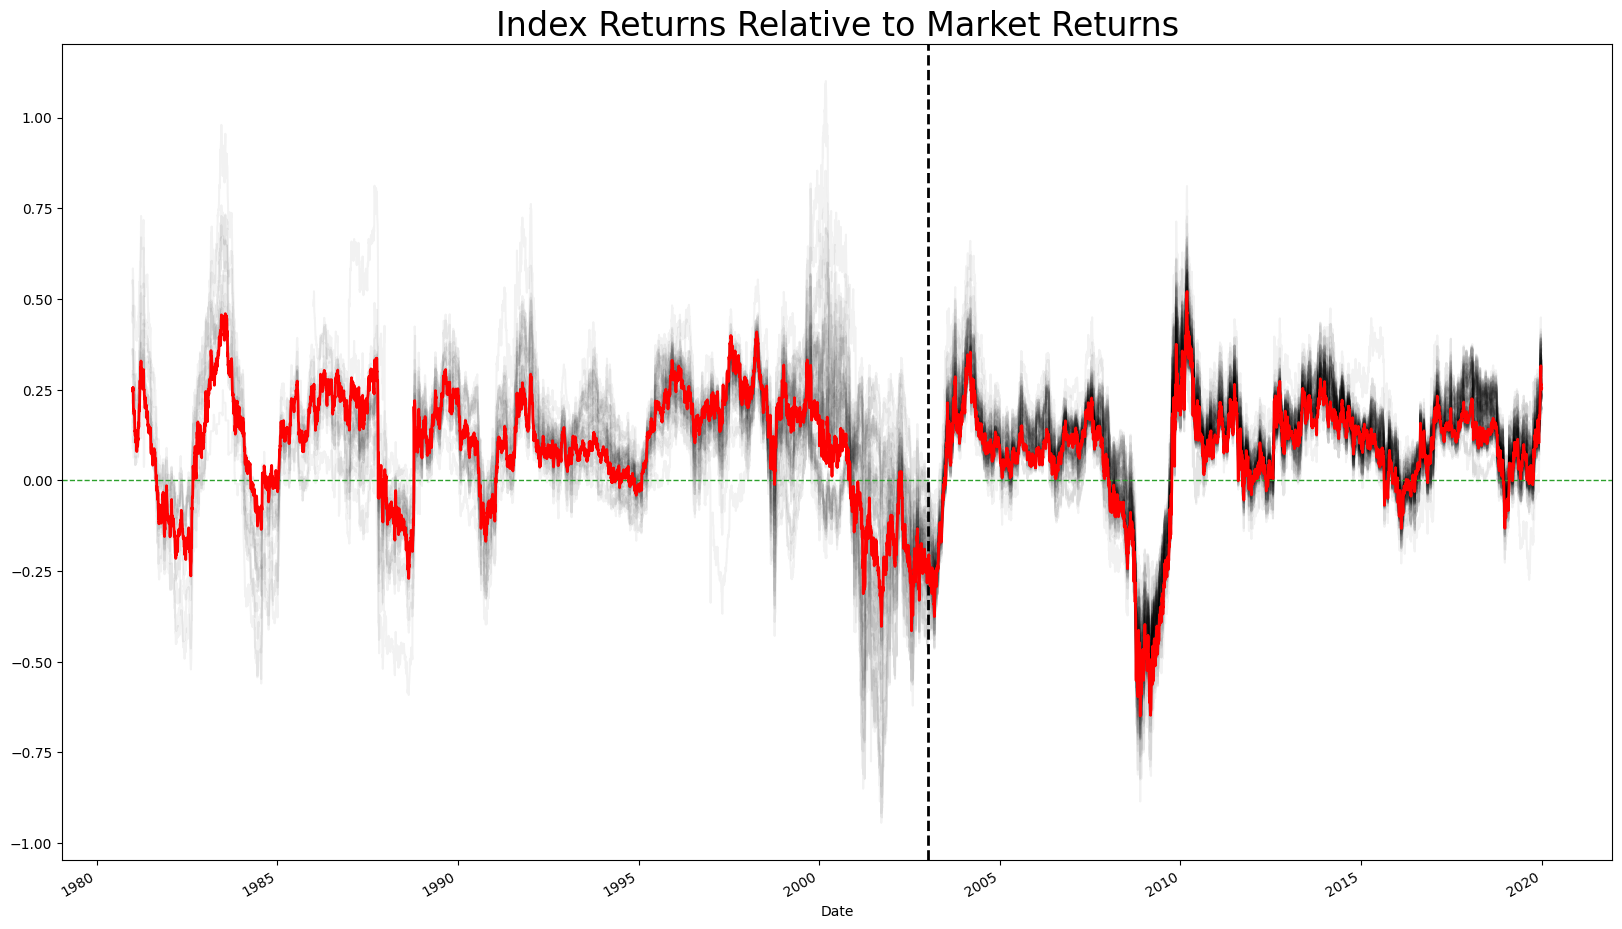

In [10]:
import matplotlib.pyplot as plt

# Calculate the year-over-year returns using the log differences of the close_data DataFrame 
# over a period of 251 trading days (i.e., one year)
yoy_return = np.log(close_data).diff(251)

# Create a new figure with a specified size, and plot the year-over-year returns 
# for each mutual fund in the close_data DataFrame using a line plot with a low alpha value
fig, ax = plt.subplots(figsize=(20, 12))
yoy_return.plot.line(legend=False, color='k', alpha=.05, ax=ax)

# Add a horizontal line at y = 0 to represent zero percent returns, and a vertical line at date = 2003
ax.axhline(0, ls='--', color='C2', linewidth=1)
ax.axvline('2003', ls = '--', color = 'k', linewidth = 2)

# Overlay the year-over-year returns for the S&P 500 index as a separate line plot with a different color and linewidth
yoy_return['S&P 500'].plot.line(color='Red', linewidth=2, ax=ax)
plt.rcParams.update({'font.size' : 20})
ax.set_title('Index Returns Relative to Market Returns')


Text(0.5, 1.0, 'Index Returns Relative to Market Returns')

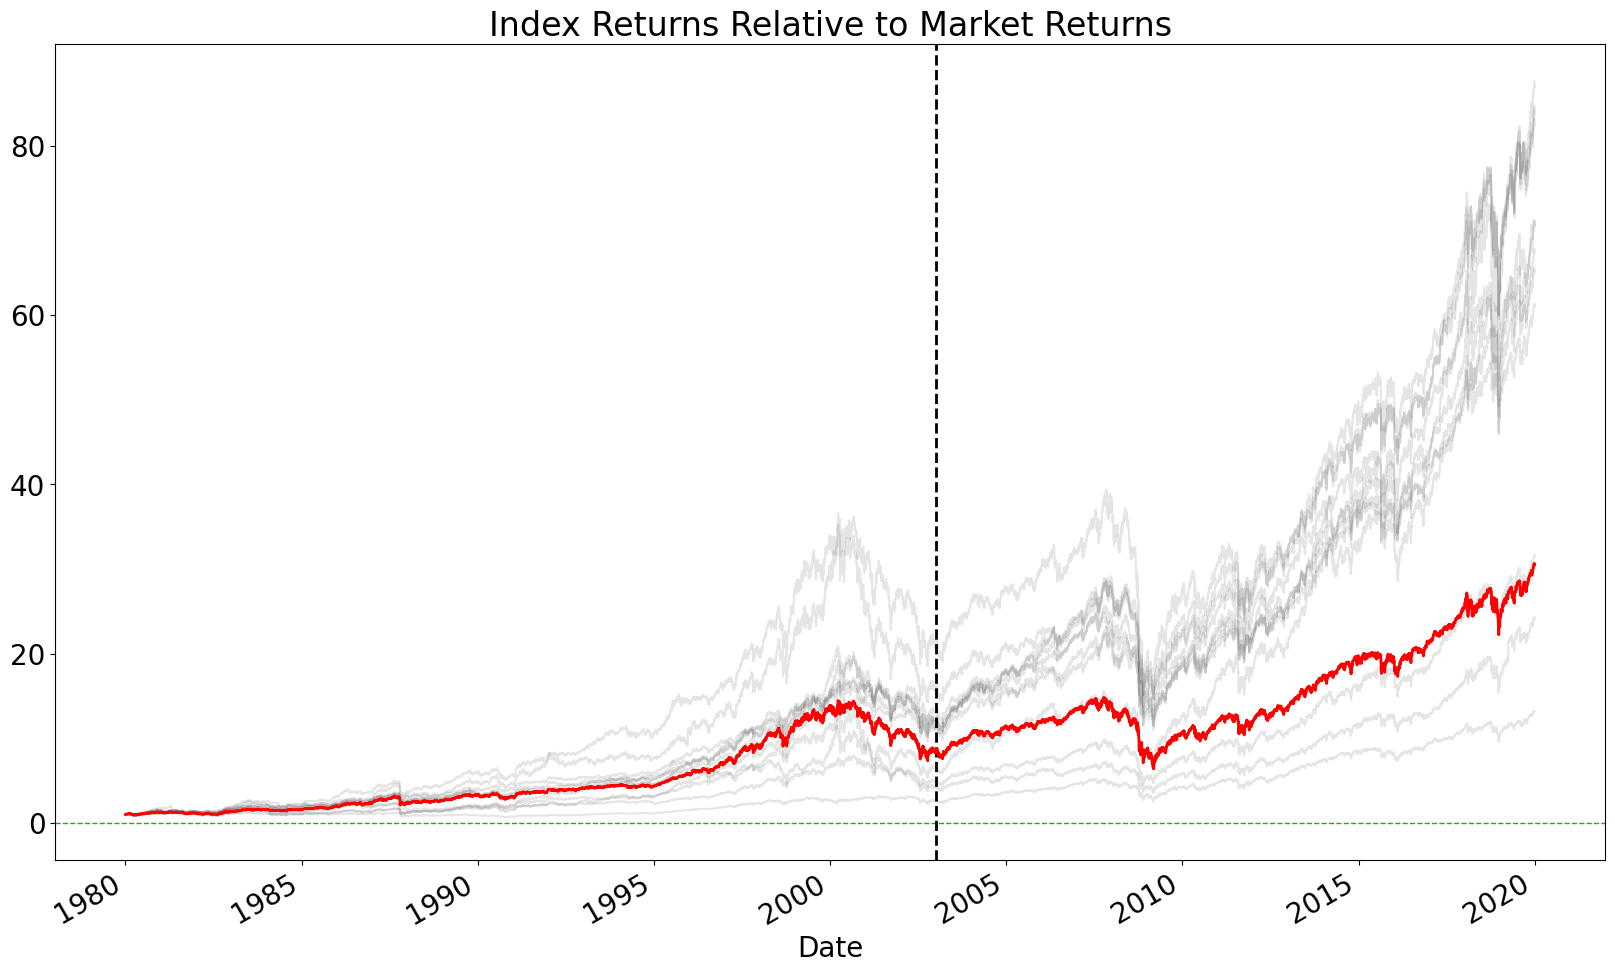

In [11]:
# Compute norm_data using first value as base (i.e., 1.0)
norm_data = close_data.div(close_data.iloc[0])

# Create a new figure with size of 20x12 inches
fig, ax = plt.subplots(figsize = (20, 12))

# Plot the norm_data as a line graph with color black, opacity 0.1, and no legend
norm_data.plot.line(legend = False, color = 'k', alpha = .1, ax = ax)

# Draw a horizontal line at y = 0 with dashed line style and color green
ax.axhline(0, ls = '--', color = 'C2', linewidth = 1)

# Draw a vertical line at x = '2003' with dashed line style and color black
ax.axvline('2003', ls = '--', color = 'k', linewidth = 2)

# Plot the 'S&P 500' column of the normalized data as a line graph with color red and thickness 2
norm_data['S&P 500'].plot.line(color='Red', linewidth=2, ax=ax)

# Update font size of all texts in the figure to 20
plt.rcParams.update({'font.size' : 20})

# Set the title of the figure
ax.set_title('Index Returns Relative to Market Returns')

# Hypothesis Testing and Confidence Intervals

Statistical inference may be divided into two major areas: tests of hypothesis and estimation. __Hypothesis tests__ make inference about whether a sample parameter relates to a singular value in a chosen way, i.e., the same as that value.  __Estimations__ give a range of values that a sample parameter could take, with a chosen level of probability, called a confidence interval. 

These topics are sometimes taught seperately, this section will attempt to teach them together as they are directly related.
The need for both methods can be demonstrated using our mutual fund and S&P 500 data. Imagine we wanted to see if a given mutual fund outperformed the S&P 500 during the great recession(December 2007 to June 2009), and if it did, was the difference more likely due to randomness or because the fund was actually more resilient? These answers wil come from performing a hypothesis test. On the other hand, if we wanted a range of returns we could be 95% certain would contain the mean return of the S&P 500 if a recession similar to the great recession were to happen again, we would want a confidence interval.

This idea of finding a range of possibilities for events that have already happened is not intuitive. What does it mean to create a confidence interval for past S&P500 returns? Haven't these returns already happened?

Although the returns have been observed, we assume that _randomness_ had a large influence on these returns. Theoretically, if we were to re-run the same time period of S&P500 returns, we would expect them to be different, ceteris paribus, _within a confidence interval_. This is definitionally randomness. There is no causal effect. The range of expected randomness for a relatively complete dataset like previous S&P500 returns is the standard error of the mean for that dataset, which will be smaller as the sample size increases. Randomness has less effect on larger datasets. 

## Hypothesis tests
As the name suggests, hypothesis tests use __hypotheses__. These are mutually exclusive, falsifiable statements. Only one can be true, and one of them will be true. Generally, these are the hypothses we begin with: 

- The _null_ hypothesis $H_o$: The true means of the the sample populations do not differ.
- The _alternate_ hypothesis $H_a$: The true means of the sample populations do differ.

### Types of Error
when making an inference about the value of the parameter, there are two types of error we can make: 

- Type 1 Error: This is the incorrect denial of a true null hypothesis - a "false positive"
- Type 2 Error: This is the incorrect acceptance of a false null hypothesis - a "false negative" 

In statistics, type 1 error is denoted by the Greek letter $\alpha$ and is called the significance level. Usually, the significance level is set to 0.05 (5%), implying that it is acceptable to have a 5% probability of incorrectly rejecting the true null hypothesis. Hence, most hypothesis tests are 95% confident in their inferences about a parameter and most confidence intervals give a range of values that the tester is 95% confident contains the true parameter. 

The probability of a type 2 error is denoted $\beta$ and $1-\beta$ is known as the power of the test. 

These two types of error are heavily related, and the tester faces a tradeoff - generally, when the probability of one type of error is minimized, the other increases. However the probability of committing both types of error decreases as the sample size increases. 

### Hypothesis Testing with Mutual Funds 
In the case of us determining the efficacy of an investment strategy, we must compare the return on strategy to the average return approximated by returns on investment in the S&P 500. These are our hypotheses: 

- $H_o$: There is no difference between the mutual fund's and S&P500's average monthly return. 
- $H_a$: The mutual funds have a higher mean gain than the S&P500. 

In particular, we would like to know if the mean returns for any and each index funds are different from and higher than returns earned by the S&P 500.

### T-values

The t-value, returned from the __T-test__ is used when we are dealing with a population of unknown, but normal, distribution. We have to check this assumption of normality prior to any t-test. Once we have done that, we can compare a given sample mean to one of three options: 

- **One Sample T-test:** The one sample t test compares the mean of your sample data to a known value. For example, we can compare a given funds average monthly return to some arbitrary value, like 7% or 10%. 
<h3 align="center">
    <font size="6">
        $t = \frac{\bar{X} - \mu}{\frac{s}{\sqrt{n}}}$
    </font>
    </h3> 
    
    
   - Null Hypothesis: sample mean is the same as hypothesized or theoretical mean
   - Alternative Hypothesis: sample mean is different from the hypothesized or theoretical mean
   - $\bar{X}$ is the sample mean 
   - $ \mu$ is the hypothesized value
   - $ \frac{s}{\sqrt{n}}$ is the standard error of the mean. The standard error of the mean is the standard deviation of the t-distribution with a given degrees of freedom. 

In [12]:
# Resample the `close_data` DataFrame by taking the first value of each month as the monthly closing value
monthly_closed_data = close_data.resample('M').first()

# Print the last 5 rows of the `monthly_closed_data` DataFrame
monthly_closed_data.tail()


,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-31,35.126400,39.759941,30.990503,39.542530,39.713707,25.792034,25.624292,35.268574,35.559998,46.166393,...,76.018021,40.260963,30.476658,99.783813,27.435658,39.930313,13.367849,26.328793,33.576427,2953.560059
2019-09-30,35.185390,38.784580,30.445387,40.388554,40.560371,25.256033,25.087616,35.319347,35.611191,45.121582,...,74.580856,39.150578,30.370667,97.703728,26.914337,38.901058,13.186357,25.675343,32.912346,2906.270020
2019-10-31,35.645599,38.633915,30.624960,39.771660,39.951832,25.128031,24.959455,35.779804,36.065323,45.679520,...,73.918167,39.294098,29.346067,96.186295,26.883211,39.103664,13.086224,26.262716,32.483128,2940.250000
2019-11-30,36.493103,40.663937,31.833950,40.644119,40.824951,26.328032,26.144951,36.630486,36.913818,48.072189,...,76.337395,40.850147,30.045620,100.013977,28.065918,41.202702,13.774644,27.672396,33.916561,3066.909912
2019-12-31,36.976166,41.718601,32.544643,40.555992,40.745579,27.064039,26.873869,37.106869,37.385204,49.166862,...,77.942230,41.703709,31.162088,102.793091,28.867355,42.458881,14.081302,28.127613,34.872189,3113.870117


In [13]:
# Compute the monthly log returns of the `monthly_closed_data` DataFrame
monthly_returns = np.log(monthly_closed_data).diff()

# Print the last 5 rows of the `monthly_returns` DataFrame
monthly_returns.tail()


,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-31,-0.005503,-0.012487,-0.008626,0.016176,0.016344,-0.015695,-0.016124,-0.005742,-0.005979,-0.009413,...,-0.004088,0.003006,0.005347,-0.000598,0.006259,0.001625,0.002813,-0.005562,-0.003611,-0.003640
2019-09-30,0.001678,-0.024837,-0.017746,0.021170,0.021095,-0.021001,-0.021166,0.001439,0.001439,-0.022891,...,-0.019087,-0.027967,-0.003484,-0.021066,-0.019184,-0.026114,-0.013670,-0.025132,-0.019976,-0.016141
2019-10-31,0.012995,-0.003892,0.005881,-0.015392,-0.015117,-0.005081,-0.005122,0.012953,0.012672,0.012289,...,-0.008925,0.003659,-0.034319,-0.015653,-0.001157,0.005195,-0.007623,0.022619,-0.013127,0.011624
2019-11-30,0.023498,0.051211,0.038718,0.021700,0.021619,0.046650,0.046403,0.023497,0.023254,0.051054,...,0.032204,0.038836,0.023558,0.039023,0.043054,0.052288,0.051269,0.052285,0.043183,0.042176
2019-12-31,0.013150,0.025605,0.022079,-0.002171,-0.001946,0.027572,0.027498,0.012921,0.012689,0.022516,...,0.020805,0.020680,0.036485,0.027408,0.028155,0.030032,0.022018,0.016316,0.027786,0.015196


In [14]:
def t_value_1samp(data, mu):
    # Compute the sample mean of `data`
    x_bar = np.mean(data)
    
    # Compute the sample standard deviation of `data`
    s = np.std(data)
    
    # Compute the sample size of `data`
    n = len(data)
    
    # Compute the degrees of freedom
    df = n - 1
    
    # Compute the t-value using the formula for a one-sample t-test
    t = (x_bar - mu) / (s / np.sqrt(n))
    
    # Return the t-value and degrees of freedom as a tuple
    return t, df

In [15]:
# Extract the 'S&P 500' column from the `monthly_returns` DataFrame and drop any rows with missing values
sp500 = monthly_returns['S&P 500'].dropna()

# Compute the annualized mean log return of the 'S&P 500' column
sp500.mean() * 12

0.08473776816463623

In [16]:
hypothesized_rate = 0.07 / 12
hypothesized_rate

0.005833333333333334

In [17]:
# Compute the t-statistic and degrees of freedom for a one-sample t-test
# using the `t_value_1samp` function, with the 'sp500' array as the data
# and the hypothesized rate of return as the population mean
t_value_1samp(data=sp500, mu=hypothesized_rate)

(0.6072595645765047, 478)

In [18]:
# Conduct a one-sample t-test using the `ttest_1samp` function from the `scipy.stats` module,
# with the 'sp500' array as the data and the hypothesized rate of return as the population mean
stats.ttest_1samp(sp500, hypothesized_rate)

Ttest_1sampResult(statistic=0.6066253507590067, pvalue=0.5443875720700815)

- **Independent Samples T-test:** The The independent samples t test (also called the unpaired samples t test) helps you to compare the means of two sets of data that came from different sources. Normally, we are checking to see if the means of the data are significantly different from a differnece of zero. But , we can also check if they are significantly different from a hypothesized or theoretical value. For instance, say we had two groups of males and one group of females and we wanted to compare average heights between the groups. For the males, we would check to see if they differed significantly from an average height difference of zero, whereas when comparing the males to the females we may want to see if they were significantly different from an average difference of 2 inches. **This hypothesized difference, $(\mu_1 - \mu_2)$, will usually be zero, but not always.**

<h3 align="center">
    <font size="6">
        $ t = \frac{(\bar{x_1}-\bar{x_2})-(\mu_1 - \mu_2)}{\sqrt{\frac{s^2_1}{n_1}+\frac{s^2_2}{n_2}}}$
    </font>
    </h3> 
    
   
   - Note that this t-test is one variation of the independent samples t-test that _does not_ assume equal variance between the samples
   
    - Null Hypothesis: sample mean is the same as hypothesized or theoretical mean
    - Alternative Hypothesis: sample mean is different from the hypothesized or theoretical mean
    

In [19]:
def t_value_ind_samp(a, b, hypothesized_difference=0, equal_var=False):
    """
    Compute the t-statistic and degrees of freedom for an independent two-sample t-test,
    assuming unequal variances and unequal sample sizes.
    
    Parameters:
    a (array-like): The first sample.
    b (array-like): The second sample.
    hypothesized_difference (float, optional): The hypothesized difference between the population means.
    equal_var (bool, optional): Whether to assume equal variances for the two populations.
    
    Returns:
    float: The t-statistic for the two-sample t-test.
    float: The degrees of freedom for the t-test.
    """
    
    # Convert the input samples to numpy arrays
    a = np.array(a)
    b = np.array(b)
    
    # Compute the sample variances and sizes for each sample
    s1, n1 = np.var(a), len(a)
    s2, n2 = np.var(b), len(b)
    
    # If the samples are independent and variances are unequal, calculate degrees of freedom and variance differently
    if (equal_var):
        # Calculate the degrees of freedom assuming equal variances
        df = n1 + n2 - 2
        # Calculate the pooled sample variance
        svar = ((n1 - 1) * s1 + (n2 - 1) * s2) / float(df)
        # Calculate the standard error of the difference in means
        denom = np.sqrt(svar * (1.0 / n1 + 1.0 / n2))
    else:
        # Calculate the degrees of freedom assuming unequal variances
        vn1 = s1 / n1
        vn2 = s2 / n2
        df = (vn1 + vn2)**2 / (vn1**2 / (n1 - 1) + vn2**2 / (n2 - 1))
        # Calculate the standard error of the difference in means
        denom = np.sqrt(vn1 + vn2)

    # Calculate the difference between sample means and the hypothesized difference
    d = np.mean(a) - np.mean(b) - hypothesized_difference
    # Calculate the t-statistic
    t = d / denom
    # Return the t-statistic and degrees of freedom as a tuple
    return t, df

In [20]:
# create variable 'prgfx' to store monthly returns of 'PRGFX' index
prgfx = monthly_returns['PRGFX'].dropna()

# calculate and print mean monthly returns of S&P 500 index and PRGFX index
sp500.mean(), prgfx.mean()

(0.0070614806803863525, 0.007124729270351658)

In [21]:
# calculate t-value and degrees of freedom for independent samples
t, df = t_value_ind_samp(sp500, prgfx)

# print t-value and degrees of freedom
print('T-value:', t)
print('Degrees of Freedom:', df)

T-value: -0.02122509385883716
Degrees of Freedom: 950.1085593772696


In [22]:
# calculate t-value using scipy.stats.ttest_ind()
t = stats.ttest_ind(sp500, prgfx).statistic

# print t-value
print("T-value:", t)

T-value: -0.021202926652936754


- **Paired Samples T-test:** A paired t test (also called a correlated pairs t-test, a paired samples t test or dependent samples t test) is where you run a t test on dependent samples. Dependent samples are essentially connected — they are tests on the same person or thing. This would be useful for us if we were doing some sort of scientific treatment to the same population - not something that is done to mutual funds. For our function, we can simply add an optional argument "equal_var" to our independent t-test funtion which will cause it to act like a paired samples t-test. 

### The T Probability Distribution
When comparing two samples drawn from a population with unknown parameters, we return a t-value(defined below) similar to the z-value, and a corresponding degrees of freedom, indicating the size of our samples. If the size of our samples is high, we can have more confidence in our result. The t-distribution is defined as: 

<h3 align="center">
    <font size="6">
        $ f(T) = \frac{(1 + \frac{T^2}{\nu})^{\frac{-(\nu+1)}{2}}}{B(0.5,0.5\nu)\sqrt(\nu)}$
    </font>
    </h3> 

    
- Where $\nu$ is the degrees of freedom of the distribution and B is the beta function, which is beyond the scope of this book and can be pulled from the scipy.stats library. 
- This is the same distribution shown in the previous chapter; the Cauchy has one degree of freedom and the Standard normal is the form of the t-distribution with more than 30 degrees of freedom

We can implement this distribution in code: 

In [23]:
import scipy.special as sc

# define a function to create the actual distribution from which we can analyze our t value from the t test
def t_distribution(df, t): 
    """
    Calculate the t distribution value given degrees of freedom (df) and a t-value.
    
    Args:
    df: int or float, degrees of freedom
    t: float, t-value
    
    Returns:
    t_dist_val: float, t distribution value
    """
    t_dist_val = ((1 + t**2 / df)
                      **(-(df + 1) / 2)) / (sc.beta(.5, .5 * df) * np.sqrt(df))
    return t_dist_val

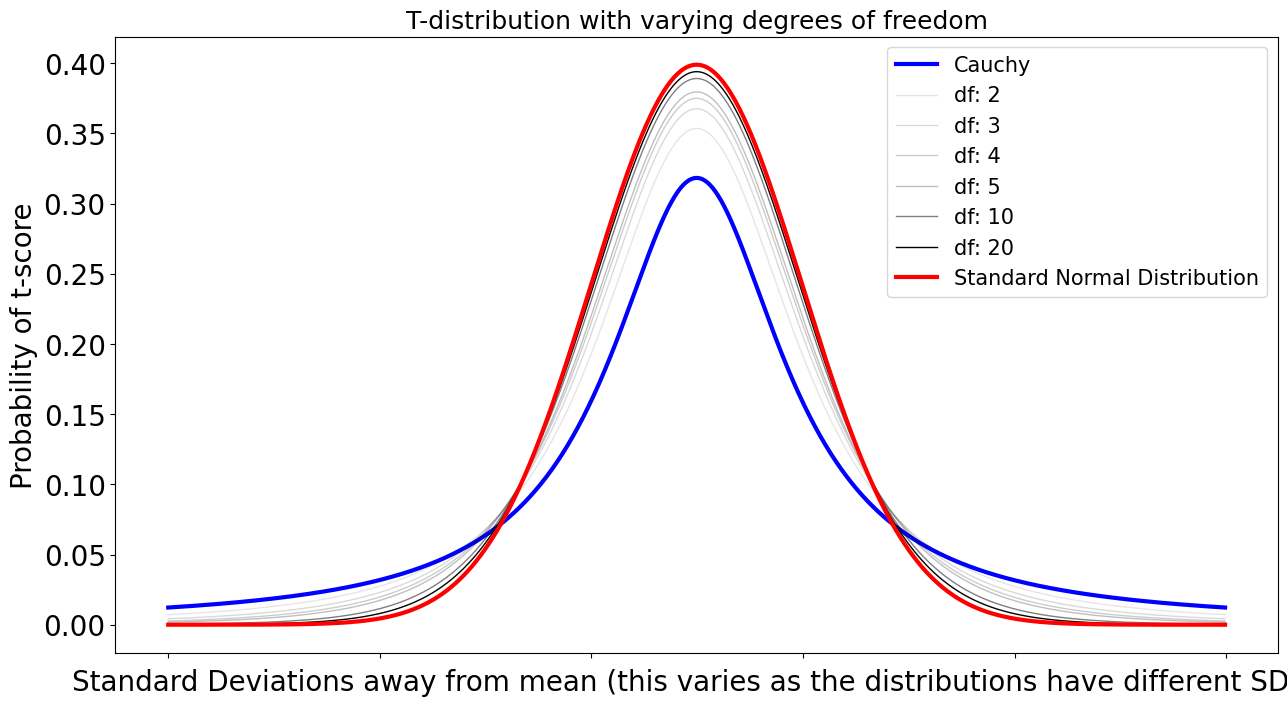

In [24]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(15, 8))

# Generate an array of 1000 values from -5 to 5
x = np.linspace(-5, 5, 1000)

# Generate a Cauchy distribution with 1 degree of freedom
cauchy = t_distribution(1, x)

# Plot the Cauchy distribution
ax.plot(cauchy, '-', lw=3, alpha=1, label='Cauchy', color='b')

# Generate and plot t-distributions with varying degrees of freedom
t_df = [2, 3, 4, 5, 10, 20]
for df in t_df:
    dist = t_distribution(df, x)
    ax.plot(dist, '-', lw=1, alpha=df / 20, label='df: ' + str(df), color='k')

# Generate and plot a standard normal distribution
gaussian = t_distribution(100000, x)
ax.plot(gaussian, lw=3, alpha=1, color='r', label='Standard Normal Distribution')

# Set the font size of the plot
plt.rcParams.update({'font.size': 15})

# Set the y-axis label
ax.set_ylabel('Probability of t-score')

# Set the x-axis label
ax.set_xlabel('Standard Deviations away from mean (this varies as the distributions have different SD\'s)')

# Set the title of the plot
plt.title('T-distribution with varying degrees of freedom')

# Remove the x-axis tick labels
ax.set_xticklabels(labels='')

# Add a legend to the plot
plt.legend()


### T-distribution p-value

As we can see, a lower sample size, and hence a lower degrees of freedom, leads to a lower probaility that our t-score is near 0 when our population means are the same, because more random variation is likely when the sample size is so low. The point of a t-score is to determine if the difference in the two means of the samples is too drastic for the true population means to be the same. As we approach 30 with our degrees of freedom, the graph doesnt change much, and this is a standard normal distribution, which the z-score uses. Some textbooks say you can use z-score for large sample sizes; it will give nearly the same answer. 

Once we get our t-score, we plug it into the equation shown below to get it's p-value. The equation uses the t-distributions's __Cumulative Density Function__. This distribution models the probability that the random variable $T$ takes at most the value $t$. We get a corresponding __p-value__, shown on the y-axis. This value is the probability of our gotten t-value if the true means were the same. 

<h3 align="center">
    $ p =  2 \cdot (1-CDF_{t_{n-1}}(|t|)) $
<h3>

This CDF, and all CDF's, can easily be modeled by, for each value t in our t-distribution, plotting t added to all previous t-values, since we used _np.linspace_ to discretely model this continuous distribution:

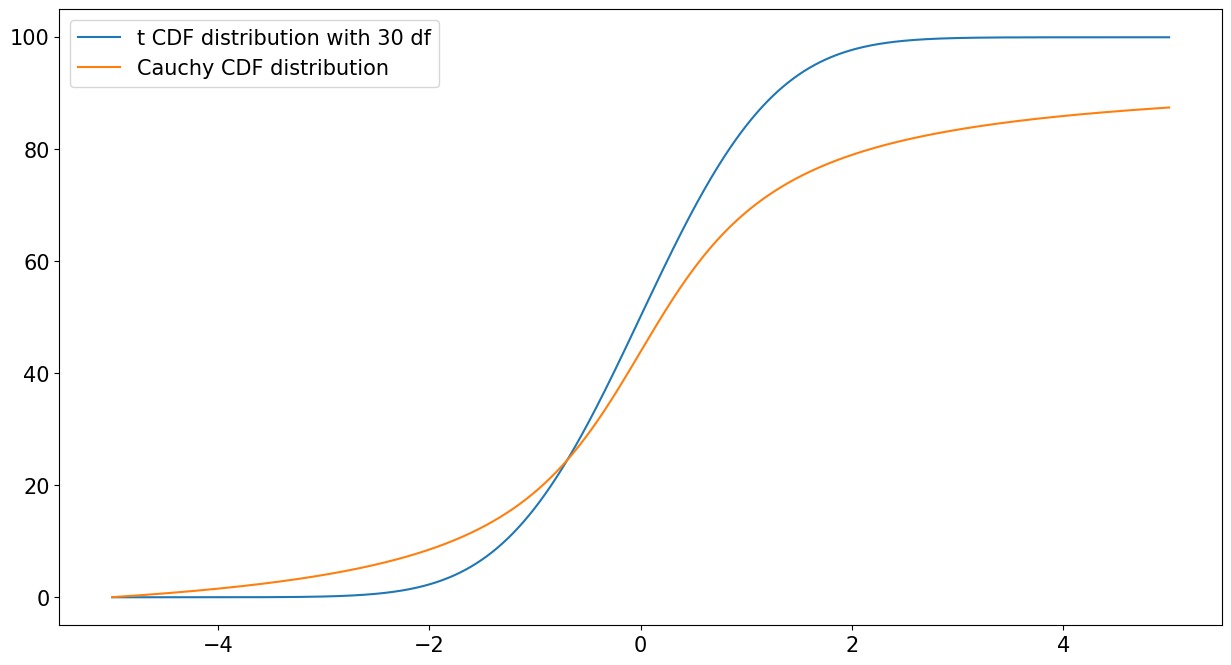

In [25]:
fig, ax = plt.subplots(figsize=(15, 8))

# Generate the x-axis values
x = np.linspace(-5, 5, 1000)

# Calculate the t-distribution and Cauchy distribution
t_dist = t_distribution(150000, x)
cauchy = t_distribution(1, x)

# Make a copy of the t-distribution and Cauchy distribution to plot the CDF
f_dist = t_dist.copy()
cauchy_f_dist = cauchy.copy()

# Calculate the cumulative distribution function for the t-distribution and Cauchy distribution
for i in range(len(t_dist)):
    f_dist[i] += f_dist[i-1]
    cauchy_f_dist[i] += cauchy_f_dist[i-1]

# Plot the CDFs for the t-distribution and Cauchy distribution
ax.plot(x, f_dist, label='t CDF distribution with 30 df')
ax.plot(x, cauchy_f_dist, label='Cauchy CDF distribution')

# Add a legend to the plot
plt.legend()

- If the corresponding p-value from our t-value is too low, we choose to __reject the null hypothesis $H_o$__, and say that our samples come from different populations who's means are different. This is a "statistically significant" result. 


- If the p-value is sufficiently high, we __fail to reject the null hypothesis $H_o$__, and say that there is a high enough chance that the samples came from populations with the same means. This is a "statistically insignificant" result. 


- The value at which significance occurs, $\alpha$, and is most commonly 0.05.

In [26]:
import scipy.stats as stats

# function that allows us to evaluate the t distribution at a given t value and df
def t_test(a, b, kind):
    
    if kind == 'one_sample': 
            t_val, df = t_value_1samp(a, b)
            print (t_val, df)
    elif kind  == 'independent': 
            t_val, df = t_value_ind_samp(a, b)
    elif kind == 'paired': 
            t_val, df = t_value_ind_samp(a, b, equal_var=True)
            
    # cdf gives probability of a value at least as extreme as observed happening; for two-sided tests this is doubled
    p_value = (1-stats.t.cdf(np.abs(t_val), df-1))  *2
    
    if p_value > .05:
        return_string = 'T-value: ' + str(t_val) + ', P-value: ' + str(
            p_value) + ', Fail to reject null hypothesis.'
    else:
        return_string = 'T-value: ' + str(t_val) + ', P-value: ' + str(
            round(p_value, 5)) + ', Reject null hypothesis.'
        
    return return_string

The function accepts $t$ and $\nu$ and returns a probability of the t value occuring if there truly was no difference between the the two sample means, or the single sample mean and one hypothesized mean. If we are intereted in knowing the p that the result is only < or >, we take the p value as is. Otherwise, if we are looking for any difference, we multiply it by 2. If the probability returned is too low, then we can reasonably assume that this means that the two means _are not truly different_. This is the core concept of statistical significance. The probability at which a non-significant difference becomes a significant one is most commonly 0.05. This means that if there is a less than 5 percent probability that the observed difference in means could have happened by chance, we can reasonably assume that the result didn't happen by chance. 

We can now implement the same t-test we perfomed earlier with our hypothesized return of a 6% yearly rate and the S&P 500, returning a p-value along with our t-statistic, using the one-sample t-test: 

In [27]:
hypothesized_rate = 0.07 / 12
t_test(sp500, hypothesized_rate, 'one_sample')

0.6072595645765047 478


'T-value: 0.6072595645765047, P-value: 0.5439676244389173, Fail to reject null hypothesis.'

## Testing for Normality

Statistical tests commonly generate a t-statistic whose interpretation must be drawn from a t-distribution. Next, let's test to see if the data used in chapter 4 follows the assumption that observations fit  a normal distribution. 

### Jarque-Bera Normality Test

The Jarque-Bera test considers whether or not a distribution's skewness and kurtosis match the skewness and kurtosis of a normal distribution:

$$t = \frac{n}{6}[S^2 + \frac{(K-3)^2}{4}]$$

The t-statistic represents the result of the test of the null hypothesis that the sample tested is not normally distributed with a given skewness and kurtosis. Notice that the skewness and kurtosis values control for the standard deviation of the distribution. Thus, despite the fact that the distributions are not identical, when controlling for the size of the standard deviation, they appear close of enough to being normally distributed that the test rejects the null hypothesis.

In [28]:
from stats import * 

def jarque_bera_test(series, use_sample_ks=False):
    # Remove any NaN values in the series
    series.dropna(inplace=True)
    print(series)
    
    # Get the number of observations in the series
    n = series.shape[0]
    
    # Compute the kurtosis and skewness of the series using the stats functions
    k = kurtosis(series, sample=use_sample_ks)
    s = skewness(series, sample=use_sample_ks)
    
    # Compute the test statistic, which is a function of the kurtosis and skewness
    t = n / 6 * (s ** 2 + (k - 3) ** 2 / 4)

    # Compute the degrees of freedom for the test
    df = n - 1
    
    # Compute the p-value for the test using the survival function of the t-distribution
    p = scipy.stats.t.sf(t, df=df)
    
    # Return the test statistic and p-value
    return t, p

In [29]:
from statsmodels.stats.stattools import jarque_bera
import scipy
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import numpy as np

# override pandas_datareader's default Yahoo finance API
yf.pdr_override()

# set start and end dates for data retrieval
start = datetime(2012, 1, 1)
end = datetime.today()

# create empty dictionary and list of stocks to fetch
stock_data = {}
stocks = ['MSFT', 'AAPL', 'PG', 'TSLA', '^GSPC']

# fetch stock data for each stock in list and add to dictionary
for key in stocks:
    stock_data[key] = web.get_data_yahoo(key, start, end)['Close']

# convert dictionary to dataframe and rename S&P500 column
stock_data = pd.DataFrame(stock_data).rename(columns = {'^GSPC':'S&P500'})

# calculate the daily price change by taking the logarithm of the closing prices and calculating the difference
price_change_data = np.log(stock_data).diff()

# print resulting dataframe
price_change_data


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,MSFT,AAPL,PG,TSLA,S&P500
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,0.023261,0.005360,-0.000449,-0.013264,0.000188
2012-01-05,0.010167,0.011041,-0.004201,-0.021522,0.002939
2012-01-06,0.015415,0.010400,-0.002408,-0.007773,-0.002540
2012-01-09,-0.013250,-0.001587,0.004211,0.012556,0.002259
...,...,...,...,...,...
2023-03-31,0.014851,0.015523,0.008375,0.060504,0.014333
2023-04-03,-0.003718,0.007672,0.005500,-0.063119,0.003692
2023-04-04,-0.000174,-0.003255,0.004804,-0.011308,-0.005814


In [30]:
# loop through each stock in price_change_data dictionary
for key, val in price_change_data.items():
    # print stock name
    print(key)
    # call the user-defined jarque_bera_test function and print the test result
    print("My JB Function:   ", jarque_bera_test(val))
    # call the built-in jarque_bera function from scipy and print the test result
    print("scipy JB Function:", jarque_bera(val)[:2])

MSFT
Date
2012-01-04    0.023261
2012-01-05    0.010167
2012-01-06    0.015415
2012-01-09   -0.013250
2012-01-10    0.003598
                ...   
2023-03-31    0.014851
2023-04-03   -0.003718
2023-04-04   -0.000174
2023-04-05   -0.009938
2023-04-06    0.025212
Name: MSFT, Length: 2833, dtype: float64
My JB Function:    (8974.912052880522, 0.0)
scipy JB Function: (8974.912052880576, 0.0)
AAPL
Date
2012-01-04    0.005360
2012-01-05    0.011041
2012-01-06    0.010400
2012-01-09   -0.001587
2012-01-10    0.003574
                ...   
2023-03-31    0.015523
2023-04-03    0.007672
2023-04-04   -0.003255
2023-04-05   -0.011355
2023-04-06    0.005481
Name: AAPL, Length: 2833, dtype: float64
My JB Function:    (3899.208827904875, 0.0)
scipy JB Function: (3899.2088279048817, 0.0)
PG
Date
2012-01-04   -0.000449
2012-01-05   -0.004201
2012-01-06   -0.002408
2012-01-09    0.004211
2012-01-10   -0.004663
                ...   
2023-03-31    0.008375
2023-04-03    0.005500
2023-04-04    0.004804


## Confidence Intervals

The confidence interval gives us the range of values that have a $1-\alpha$ probability of containing the population mean, based off of our sample mean. Confidence intervals, as hypothesis tests do, make use of the standard error of the mean of a sample. For a sample with mean $\bar{x}$, the confidence interval lower and upper bounds, respectively, are found by these formulas: 
<h3 align="center">
    <font size="4">
        $ CI = {\bar{x} - t_{\frac{\alpha}{2}}\frac{s}{\sqrt{n}}, \bar{x} + t_{\frac{\alpha}{2}}\frac{s}{\sqrt{n}}}$
    </font>
    </h3> 
- Where $t_{\frac{\alpha}{2}}$ is the $1-\frac{\alpha}{2}$ quantile of the $t_{n-1}$ distribution

This function can be easily built in code using the _percent point function_ in Scipy. This function gives the percentage of the t distribution behind a given point. This is also known as the quintile. We first make a function to return the quintile in a t distribution associated with a given df and alpha level, and then make a function to make confidence interval for passed data: 

In [31]:
def t_quintile(df, alpha):
    q = (1 + alpha) / 2
    a = stats.t.ppf(q, df)
    return a

Now we make a function that is passed an array of data and an alpha value and returns a confidence interval: 

In [32]:
def confidence_interval(data, alpha):
    """
    This function calculates the confidence interval for a given data and alpha level.
    """
    n = len(data) # sample size
    df = n - 1 # degrees of freedom
    x_bar = np.mean(data) # sample mean
    SE = np.std(data) / np.sqrt(n) # standard error
    CI_quintile = t_quintile(df, alpha) # t-value for given alpha level and df
    CI = x_bar - CI_quintile * SE, x_bar + CI_quintile * SE # lower and upper bound of CI
    return CI

In [33]:
# calculate the confidence interval for sp500 data with a significance level of 0.05
sp500_CI = confidence_interval(sp500, 0.05)

# print the calculated confidence interval
sp500_CI

(0.006934593241426297, 0.007188368119346408)

In [34]:
sp500_yearly_CI = (1 + sp500_CI[0]) ** 12, (1 + sp500_CI[1]) ** 12

In [35]:
sp500_yearly_CI

(1.0864634873490415, 1.0897538656572028)

In [36]:
yearly_close_data = pd.DataFrame(close_data).resample('Y').first()
yearly_changes = np.log(yearly_close_data).diff()
yearly_changes

,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
1980-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-12-31,NaN,0.373945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.219247,...,NaN,NaN,NaN,NaN,0.444489,NaN,NaN,NaN,0.292461,0.253979
1982-12-31,NaN,-0.020714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010940,...,NaN,NaN,NaN,NaN,-0.155439,-0.012121,NaN,NaN,-0.008201,-0.105083
1983-12-31,NaN,0.192326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.270907,...,NaN,NaN,NaN,NaN,0.013850,0.258291,NaN,NaN,0.181910,0.119646
1984-12-31,NaN,0.207397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.250165,...,NaN,NaN,NaN,NaN,0.230555,0.247645,NaN,NaN,0.050682,0.170396
1985-12-31,NaN,-0.087750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007457,...,NaN,NaN,NaN,NaN,-0.244129,-0.258694,NaN,NaN,-0.022556,0.008075
1986-12-31,NaN,0.171686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.221965,...,NaN,NaN,NaN,NaN,0.299126,0.243879,NaN,0.103741,0.230368,0.236968
1987-12-31,NaN,0.112441,0.024668,NaN,NaN,NaN,0.040800,NaN,0.121338,0.038209,...,NaN,NaN,NaN,NaN,0.496225,0.117398,NaN,0.172814,-0.087273,0.162006
1988-12-31,NaN,0.004728,0.002421,NaN,NaN,NaN,0.056241,NaN,0.017345,-0.016121,...,NaN,NaN,NaN,NaN,0.137327,0.085508,NaN,-0.001301,-0.351369,0.037784


In [37]:
yearly_return_CIs = confidence_interval(yearly_changes, 0.05)

c:\Users\akoto\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


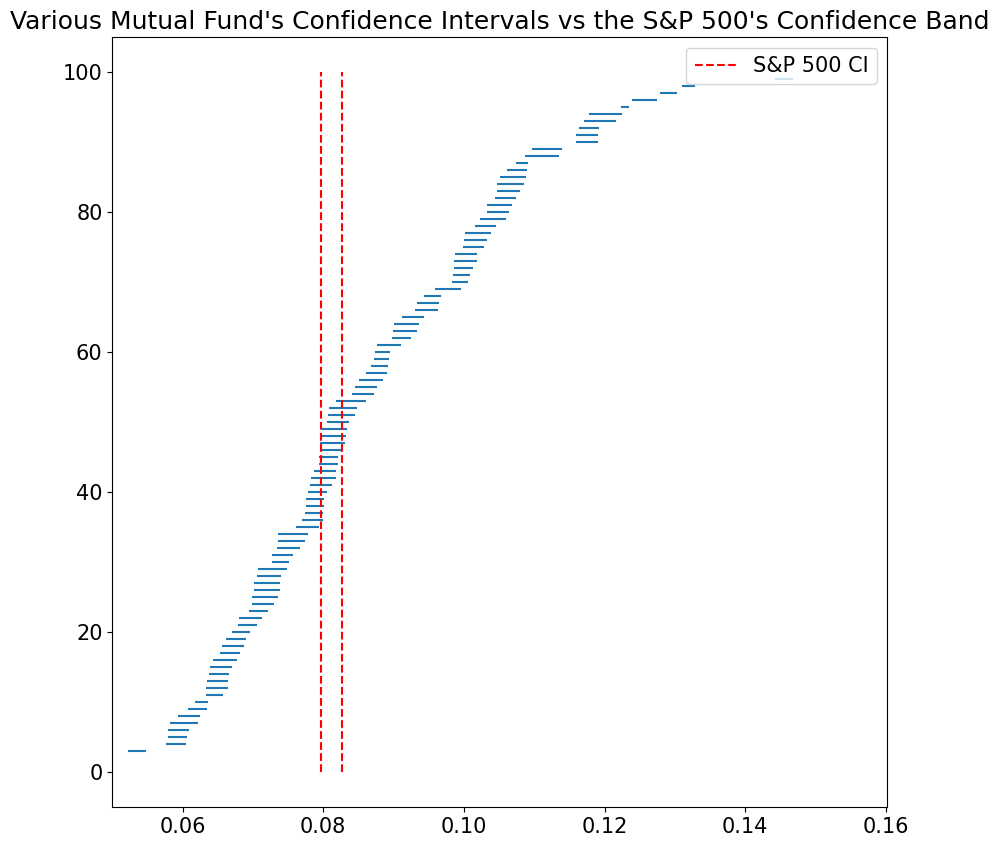

In [38]:
fig, ax = plt.subplots(figsize=(10, 10))

# Create an array for the Y-axis using the number of mutual funds
Y_axis = np.arange(len(yearly_return_CIs[0]))

# Plot the horizontal lines with the lower and upper bounds for each mutual fund
ax.hlines(y=Y_axis, xmin=yearly_return_CIs[0].sort_values(), xmax=yearly_return_CIs[1].sort_values())

# Plot the vertical lines for the S&P 500 confidence band
ax.vlines(x=[yearly_return_CIs[0]['S&P 500'], yearly_return_CIs[1]['S&P 500']], ymin=0, ymax=100, label='S&P 500 CI', color='r', linestyle='--')

# Set the title of the plot
ax.set_title('Various Mutual Fund\'s Confidence Intervals vs the S&P 500\'s Confidence Band')

# Set the limit for the x-axis
ax.set_xlim(0.05)

# Add a legend to the plot
ax.legend()


### ANOVA

While using T-tests and Z-tests to analyze means of groups, we were restricted to only being able to compare two groups at a time. What if we wanted to see of there was significant differences between more than two groups? The **ANOVA**, or **Analysis of Variance** techniques allow us to test the null hypothesis that there is no significant difference between $k$ (some integer larger than 2) groups. 

- $H_o$: $\mu_1 = \mu_2 = \cdots = \mu_k$
- $H_a$: At least two of the means are not equal. 

#### Mutual Fund Categories
For our motivating example, we will continue to use our mutual fund data, but we must be able to group our mutual funds into categories. Luckily, the dataset contains a column labeled "Morningstar Category", which is assigned by [Morningstar](http://im.mstar.com/im/newhomepage/Morningstar_Category_Definitions_US_June_2016.pdf) based off of a funds previous holdings statistics and tries to give investors information about a fund's risk and investment strategy. 

In [39]:
mutual_fund_data[['Symbol', 'Morningstar Category']]

,Symbol,Morningstar Category
0,AGTHX,Large Growth
1,FCNTX,Large Growth
2,CWMAX,Large Blend
3,CWMCX,Large Blend
4,CWMEX,Large Blend
...,...,...
95,FDTRX,Large Growth
96,FDYZX,Large Growth
97,BBVLX,Large Value
98,PEYAX,Large Value


We can check to see how many of each category of fund are in our data using the _.value_counts()_ method

In [40]:
mutual_fund_data['Morningstar Category'].value_counts()

Large Growth      51
Large Value       20
Large Blend       17
Mid-Cap Growth     6
Mid-Cap Value      2
Health             1
Mid-Cap Blend      1
Communications     1
Small Value        1
Name: Morningstar Category, dtype: int64

For ANOVA and for T-test analysis, a sample size of only 2 is not large enough for us to make meaningful assumptions about the population from which the sample was drawn, so we choose to only include the fund categories that contain greater than 2 funds in our data. 

In [41]:
mutual_fund_data['Morningstar Category'].value_counts() > 2

Large Growth       True
Large Value        True
Large Blend        True
Mid-Cap Growth     True
Mid-Cap Value     False
Health            False
Mid-Cap Blend     False
Communications    False
Small Value       False
Name: Morningstar Category, dtype: bool

Next, identify the fund symbols in our _mutual_fund_data_ that will be used in the analysis. This will leave us with all but 6 of the funds and 94 rows of data instead of 100: 

In [42]:
fund_types = mutual_fund_data['Morningstar Category'].value_counts() > 2
relevant_fund_types = fund_types[fund_types]
relevant_funds = mutual_fund_data[mutual_fund_data['Morningstar Category'].isin(relevant_fund_types.index)]
relevant_funds

,Symbol,Name,Category1,Category2,Category3,Morningstar Category,Morningstar Rating,Market cap,Current yield,Fees,Action
0,AGTHX,American Funds The Growth Fund of America Class A,US Equity,Broad market,Large cap,Large Growth,3.0,"$138,592,080,000",0.22%,0.62%,Analyze
1,FCNTX,Fidelity Contrafund Fund,US Equity,Broad market,Large cap,Large Growth,3.0,"$121,762,870,000",0.00%,0.74%,Analyze
2,CWMAX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",1.46%,0.63%,Analyze
3,CWMCX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",0.79%,1.40%,Analyze
4,CWMEX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",1.28%,0.87%,Analyze
...,...,...,...,...,...,...,...,...,...,...,...
95,FDTRX,Franklin DynaTech Fund Class R6,US Equity,Broad market,Large cap,Large Growth,5.0,"$9,600,000,000",0.00%,0.51%,Analyze
96,FDYZX,Franklin DynaTech Fund Advisor Class,US Equity,Broad market,Large cap,Large Growth,5.0,"$9,600,000,000",0.00%,0.62%,Analyze
97,BBVLX,Bridge Builder Large Cap Value Fund,US Equity,Broad market,Large cap,Large Value,4.0,"$9,500,000,000",1.55%,0.25%,Analyze
98,PEYAX,Putnam Large Cap Value Fund Class A,US Equity,Broad market,Large cap,Large Value,4.0,"$9,393,340,000",1.23%,0.91%,Analyze


In [43]:
relevant_fund_type_names = {}
for fund_type in relevant_fund_types.index:
    relevant_fund_type_names[fund_type] = relevant_funds['Symbol'][relevant_funds['Morningstar Category'] == fund_type]

In [44]:
relevant_fund_type_names

{'Large Growth': 0     AGTHX
 1     FCNTX
 9     AMCFX
 10    CAFAX
 11    CAFCX
 12    CAFEX
 13    CAFFX
 14    FMACX
 15    TRBCX
 22    FDGRX
 23    FBGRX
 24    AMCPX
 25    EAGRX
 27    FMAGX
 28    HACAX
 30    PRGFX
 36    FOCPX
 37    CNGAX
 38    CNGCX
 39    CNGEX
 40    CNGFX
 41    FNEFX
 42    FOCKX
 48    TWCUX
 49    EGFFX
 50    EGFIX
 51    ANEFX
 61    VAFAX
 63    FCGAX
 64    FGSRX
 65    FIFRX
 70    FKGRX
 72    AULDX
 73    AULGX
 74    AULNX
 75    AULRX
 76    AULYX
 77    AKRSX
 78    MFEIX
 79    POLIX
 80    FKDNX
 82    VWUSX
 83    LSGRX
 84    SEEGX
 91    SBLYX
 92    AKRIX
 93    MFEGX
 94    FDNRX
 95    FDTRX
 96    FDYZX
 99    TWCGX
 Name: Symbol, dtype: object,
 'Large Value': 16    AFMFX
 17    AMRFX
 18    CMLAX
 19    CMLCX
 20    CMLEX
 21    CMLFX
 26    AMRMX
 43    DFLVX
 44    CDDRX
 45    CDDYX
 46    CDIRX
 47    CVIRX
 52    HLIEX
 59    DDFIX
 60    DDFRX
 66    PRFDX
 69    VWNFX
 81    MADVX
 97    BBVLX
 98    PEYAX
 Name: Symbol, d

These symbols are only useful to us insofaras they allow us to pull the monthly returns for them. Our ANOVA analysis only cares about the _categorical_ returns, not the individual funds returns. Hence, we will create a dictionary that combines all of the monthly returns for each fund in a category and treats them as equivalent, because fund type category is the dependent variable of interest for this analysis.

In [45]:
# Create an empty dictionary called fund_type_returns
fund_type_returns = {}

# Loop through the keys of the relevant_fund_type_names dictionary
for key in relevant_fund_type_names.keys():
    
    # For each key, create an empty list in the fund_type_returns dictionary
    fund_type_returns[key] = []
    
    # Loop through the values associated with the current key
    for val in relevant_fund_type_names[key]:
        
        # Get the monthly returns associated with the current value and remove any NaN values
        clean_returns = monthly_returns[val].dropna()
        
        # Add the clean returns to the list associated with the current key in the fund_type_returns dictionary
        fund_type_returns[key].extend(clean_returns)

In [46]:
[print(f'{key}: {np.mean(fund_type_returns[key])}') for key in fund_type_returns]

Large Growth: 0.008346027095709614
Large Value: 0.007025138196091943
Large Blend: 0.007410825142953895
Mid-Cap Growth: 0.00929254006922004


[None, None, None, None]

### Assumptions needed for ANOVA
There are three assumptions that must be met in order to carry out an ANOVA test: 

1. The experimental errors of the data are normally distributed
2. Homoscedasticity - the variances of your factors are all roughly the same (and at least follow the same distribution)
3. Samples are independent - Selection of one sample had no effect on any other sample

A quick and easy way to check the distributions of our categorical variables is with histograms:

0        0.110001
1       -0.021054
2       -0.130496
3        0.015038
4        0.071974
           ...   
12708    0.006259
12709   -0.019184
12710   -0.001157
12711    0.043054
12712    0.028155
Length: 12713, dtype: float64

JB Test: (11587.55805178527, 0.0)
0      -0.006682
1       0.044580
2      -0.013515
3       0.003653
4       0.018837
          ...   
4607   -0.006512
4608   -0.014809
4609    0.024449
4610    0.048732
4611    0.013062
Length: 4612, dtype: float64

JB Test: (4477.857479940821, 0.0)
0       0.031263
1       0.016650
2      -0.017700
3      -0.025174
4      -0.057644
          ...   
4249   -0.008641
4250   -0.020459
4251    0.010769
4252    0.041017
4253    0.019436
Length: 4254, dtype: float64

JB Test: (2738.337091946793, 0.0)
0       0.042570
1      -0.020140
2      -0.122194
3       0.038166
4       0.074594
          ...   
1495    0.015257
1496   -0.017600
1497   -0.053676
1498    0.024787
1499    0.024524
Length: 1500, dtype: float64

JB Test: (1042.080

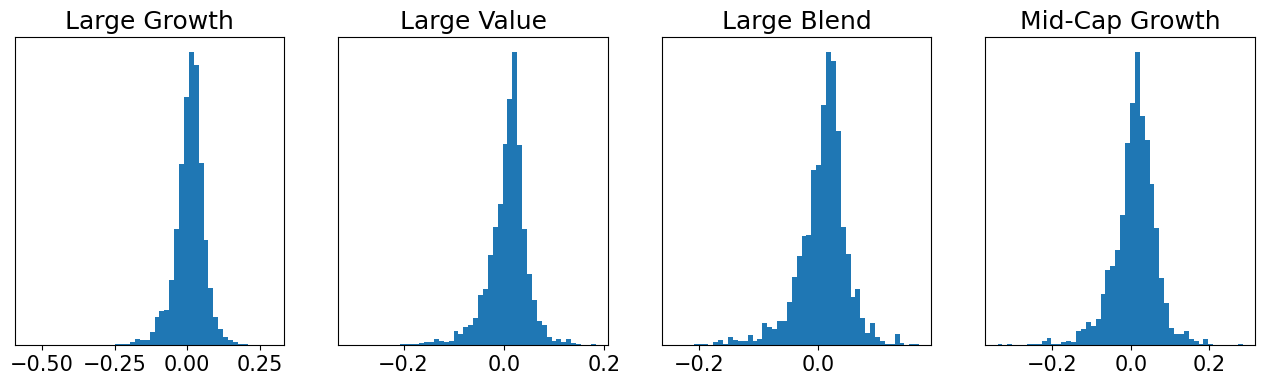

In [47]:
# Create a figure with 1 row and 4 columns, and set the figure size to 16 inches by 4 inches
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

# Loop through the keys in the fund_type_returns dictionary
for num, key in enumerate(fund_type_returns):
    
    # Get the list of monthly returns associated with the current key, and convert it to a pandas Series object
    series = pd.Series(fund_type_returns[key])
    
    # Plot a histogram of the monthly returns on the current subplot
    axs[num].hist(series, bins=50)
    
    # Set the title of the current subplot to the current key (i.e., the fund type)
    axs[num].set_title(key)
    
    # Hide the y-axis ticks for the current subplot
    axs[num].set_yticks([])
    
    # Print the results of a Jarque-Bera normality test on the monthly returns for the current fund type
    print('\nJB Test: ' + str(jarque_bera_test(series)))

It is obvious that our variables are all normally distributed, which is a core assumption of ANOVA. 

## F-Statistic
The distribution used for the hypothesis test is a new one. It is called the F distribution, named after Sir Ronald Fisher, an English statistician. The F-statistic is a ratio. There are two sets of degrees of freedom; one for the numerator and one for the denominator. 

The F distribution is derived from the t-distribution. The values of the F distribution are squares of the
corresponding values of the t-distribution. One-Way ANOVA expands the t-test for comparing more than two groups.
The scope of that derivation is beyond the level of this textbook. 

To calculate the F ratio, two estimates of the variance are made:

1. **Variance between samples**: An estimate of $\sigma^2$ that is the variance of the sample means multiplied by n (when the sample sizes are the same.). If the samples are different sizes, the variance between samples is weighted to account for the different sample sizes. The variance is also called **variation due to treatment or explained variation.**

2. **Variance within samples**: An estimate of $\sigma^2$ that is the average of the sample variances (also known as a pooled variance). When the sample sizes are different, the variance within samples is weighted. The variance is also called **the variation due to error or unexplained variation.**

- $SS_b$ = the sum of squares that represents the variation among the different samples

- $SS_w$ = the sum of squares that represents the variation within samples that is due to chance.

To find a "sum of squares" means to add together squared quantities that, in some cases, may be weighted. We used sum of squares to calculate the sample variance and the sample standard deviation. 

MS means "mean square." $MS_b$ is the variance between groups, and $MS_w$ is the variance within groups. These measurements are the total sum of squares of their variances divided by the degrees of freedomom of the measure to give a mean value. 

#### Caluculating the F-Statistic

#### Counting Statistics
In order to accurately calculate the _Mean sum of squares_ we need to have denominator to divide the _total sum of squares_ by. For the sum of squares between groups, this is one minus the number of groups, and for the sum of squares within groups, this is the total number of observations minus the number of groups.

- $k$ = the number of different groups
- $n_j$ = the size of the $j^{th}$ group
- $N$ = total number of all the values combined (total sample size: $\sum{n_j}$)
- $df$'s for the numerator(between samples): $df_b = k – 1$
- $df$'s for the denominator($df$'s within samples): $df_w = k – 1$ 

These counting measures can be packaged into one function and demonstrated with our mutual fund categories:

In [48]:
def get_anova_counts(*args):
    # Calculate the number of groups (k) as the number of arguments passed to the function
    k = len(args)
    
    # Calculate the total number of observations (N) as the sum of the lengths of all the arguments
    N = 0
    for arg in args:
        N += len(arg)
    
    # Calculate the degrees of freedom between groups (dfbn) as k-1
    dfbn = k - 1
    
    # Calculate the degrees of freedom within groups (dfwn) as N-k
    dfwn = N - k

    # Return the counts as a tuple containing k, N, dfbn, and dfwn
    return k, N, dfbn, dfwn

In [49]:
get_anova_counts(fund_type_returns['Large Growth'],
                 fund_type_returns['Large Value'],
                 fund_type_returns['Large Blend'],
                 fund_type_returns['Mid-Cap Growth'])

(4, 23079, 3, 23075)

Our data has 4 groups with 23079 total observations. 

#### Sum of Squares Between Groups
- Explained variation: sum of squares representing variation among the different samples:

    - $SS_{b} = \sum_{j = 1}^{k}{n_j(\bar{x_j} - \bar{x})^2}$
    
    
This measures the _total_ variation between the samples. For each group passed, the mean of all values is subtracted from the mean of the group, and that value is squared, then multiplied by the size of each group, because the measure must be scaled to the size of the group to capture the total sum of squares. 

In [50]:
def SSB(*args):
    ssb = 0
    alldata = np.concatenate(args) # concatenate all arguments into a single array

    grand_mean = np.mean(alldata) # calculate the overall mean of all data

    for arg in args: # loop over each argument
        group_mean = np.mean(arg) # calculate the mean of the current group

        n = len(arg) # get the number of observations in the current group
        val = n * (group_mean - grand_mean)**2 # calculate the contribution to SSB for the current group

        ssb += val # add the contribution to SSB

    return ssb

In [51]:
SSB(fund_type_returns["Large Growth"], fund_type_returns['Large Value'],
    fund_type_returns['Large Blend'], fund_type_returns['Mid-Cap Growth'])

0.009868759674344307

- Unexplained variation: sum of squares representing variation within samples:

    - $SS_w = \sum_{j = 1}^{k}{\sum_{i = 1}^{n_j}{(x_i - \bar{x_j})^2}}$
    
This measure adds up the squared difference between all observations in a group and that individual group's mean. This function will iterate once for each individual observation in the groups, much more than SSB which only iterates once for each group. 

In [52]:
def SSW(*args):
    ssw = 0
    for arg in args: 
        group_mean = np.mean(arg)
        val = 0 
        for i in arg:
            val += np.sum(i - group_mean)**2
        ssw += val
    return ssw

In [53]:
SSW(fund_type_returns['Large Growth'],
               fund_type_returns['Large Value'],
               fund_type_returns['Large Blend'],
               fund_type_returns['Mid-Cap Growth'])

53.803161858162966

 - Total variation across the dataset: 

    - $SS_t = SS_b + SS_w$
    
This is a measure of the total sum of squares in the dataset. Simply an addition of SSB and SSW. 

In [54]:
def get_sum_square_stats(*args): 
    ssw = SSW(*args)
    ssb = SSB(*args)
    sst = ssb + ssw
    return ssw, ssb, sst

In [55]:
get_sum_square_stats(fund_type_returns['Large Growth'],
               fund_type_returns['Large Value'],
               fund_type_returns['Large Blend'],
               fund_type_returns['Mid-Cap Growth'])

(53.803161858162966, 0.009868759674344307, 53.81303061783731)

#### Mean Sum of Squares 

For the F-statistic and by extension the ANOVA test, the _mean_ sum of squares with and between of are greater interest than the total sum of squares. Dividing each total member by the appropriate degrees of freedom allows us to compare ratios, and determine the true observed difference in variance. 

- Mean square (variance estimate) explained by the different groups:
$MS_b = \frac{SS_b}{df_b} = \frac{SS_b}{k-1}$
- Mean square (variance estimate) that is due to chance (unexplained): $MS_w = \frac{SS_w}{df_w} = \frac{SS_w}{n - k}$

The one-way ANOVA test depends on the fact that $MS_b$ can be influenced by population differences among means of the several groups. Since $MS_w$ compares values of each group to its own group mean, the fact that group means might
be different does not affect $MS_w$. The null hypothesis says that all groups are samples from populations having the same normal distribution. The alternate
hypothesis says that at least two of the sample groups come from populations with different normal distributions. If the null hypothesis is true, $MS_b$ and $MS_w$ should both estimate the same value. 

Finally, we arrive at the **F-Statistic**, which will function for us as the T-Statistic did earlier this chapter, as an input into one minus its cumulative density function to recieve a p-value telling us the likelihood of its occurence if our null hypothesis was true. 

- $ F = \frac{MS_b}{MS_w}$

With a density function:
<h3 align="center">
    <font size="5">
        $ f(x, df_1, df_2) = \frac{df_2^{df_2/2} df_1^{df_1/2} x^{df_1 / 2-1}}
                        {(df_2+df_1 x)^{(df_1+df_2)/2}
                         \beta(df_1/2, df_2/2)}$
    </font>
    </h3> 



where $df_1$ and $df_2$ are the
shape parameters and
$\beta$ is the beta function.  The formula for the beta function
is
<ul>
$B(a, b) = \int_0^1 t^{a-1}(1-t)^{b-1}dt
        = \frac{\Gamma(a)\Gamma(b)}{\Gamma(a+b)}$,
 
<p>where <span class="math notranslate nohighlight">\(\Gamma\)</span> is the gamma function.</p>
    
These funtions could be implemented manually using basic math symbols, but for our purposes, importing them from Scipy will be much more pragmatic.
    
We create the last accessory function in our ANOVA analysis called _finish_anova_. This models the survival function of the F-distribution(1 - CDF), which returns the p-value in the same way the survival function of t-distribution gave us a p-value. 

In [56]:
from scipy.stats import f as f_dist
def finish_anova(f, dfwn, dfbn): 
    # use scipy to plug f-value into f distribution to return p-value
     p_value =  1 - f_dist.cdf(f, dfwn, dfbn)
    
     if p_value > .05:
        return_string = "F-value: " + str(f) + ", P-value: " + str(
            p_value) + ", Fail to reject null hypothesis."
     else:
        return_string = "F-value: " + str(f) + ", P-value: " + str(
            round(p_value, 5)) + ", Reject null hypothesis."

     return return_string

The user-called funtion _anova_ will accept a variable number of arguments and perform an ANOVA test. We use the _get_anova_counts_ function, the _get_sum_square_stats_ function, and use the returned values to calculate MSB, MSW, and f. We then send it off to _finish_anova_ for our p-value and a packaged message displaying the result. 

In [57]:
def anova(*args):
    # Calculate the number of groups, total number of observations, and degrees of freedom for between and within groups
    k, N, dfbn, dfwn = get_anova_counts(*args)
    
    # Calculate sum of squares for between, within, and total
    ssw, ssb, sst = get_sum_square_stats(*args)

    # Calculate mean squares for between and within groups
    msb = ssb / dfbn
    msw = ssw / dfwn
    
    # Calculate the F-value by dividing mean square between by mean square within
    f = msb / msw

    # Return the results of the F-test as a string
    return finish_anova(f, dfbn, dfwn)

In [58]:
anova(fund_type_returns['Large Growth'],
      fund_type_returns['Large Value'],
      fund_type_returns['Large Blend'],
      fund_type_returns['Mid-Cap Growth'])

'F-value: 1.4108317654008231, P-value: 0.2374578740360631, Fail to reject null hypothesis.'

In [59]:
stats.f_oneway(fund_type_returns['Large Growth'],
               fund_type_returns['Large Value'],
               fund_type_returns['Large Blend'],
               fund_type_returns['Mid-Cap Growth'])

F_onewayResult(statistic=1.4108317654008242, pvalue=0.2374578740359998)